In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
holidays_events = pd.read_csv("https://www.dropbox.com/s/bxyamlpevkiwwoq/holidays_events.csv?dl=1")
oil = pd.read_csv("https://www.dropbox.com/s/l6ln0ztl4m0pw3a/oil.csv?dl=1",parse_dates=['date'],index_col='date')
sample_submission = pd.read_csv("https://www.dropbox.com/s/68jjl61x6u3klos/sample_submission.csv?dl=1")
stores = pd.read_csv("https://www.dropbox.com/s/lcxn6r9bs2exguq/stores.csv?dl=1")
test = pd.read_csv("https://www.dropbox.com/s/cvdo1gn7r5lu2uz/test.csv?dl=1",index_col='id')
train = pd.read_csv("https://www.dropbox.com/s/s8p2b5awnuqfk0d/train.csv?dl=1",index_col='id')
transactions = pd.read_csv("https://www.dropbox.com/s/92fij9bcwt0e0cj/transactions.csv?dl=1")

C:\Users\ndzad\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Wypełnienie braków

In [10]:
oil.fillna(method='bfill',inplace=True)

Wykres autokorelacji (ACF)

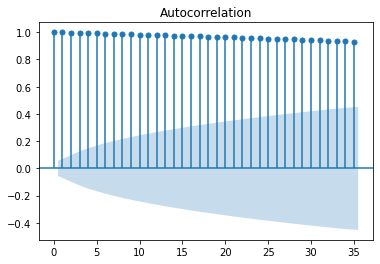

In [27]:
sm.graphics.tsa.plot_acf(oil,lags=np.round(np.sqrt(len(oil))))
plt.show()

Wykres cześciowych korelacji (PACF)

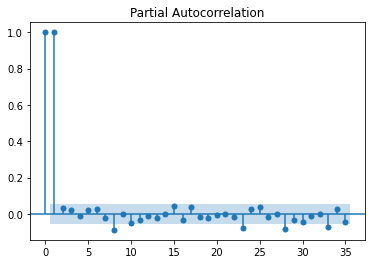

In [28]:
sm.graphics.tsa.plot_pacf(oil,lags=np.round(np.sqrt(len(oil))))
plt.show()

Różnicujemy szereg czasowy

In [23]:
oil_diff = oil.shift().diff().dropna()

Test Boxa-Ljunga

In [31]:
sm.stats.acorr_ljungbox(oil_diff, lags=[np.round(np.sqrt(len(oil_diff)))], return_df=True)

,lb_stat,lb_pvalue
35,33.245083,0.552998


p-value = 0.552998, zatem przyjmujemy H_0, że szereg jest białym szumem

Z powyższych rozważań wynika, że różnice między kolejnymi wartościami są losowe, więc nie możemy w sensowny sposób robić predykcji.